# Loan Prediction

This project was started as a motivation for learning Machine Learning Algorithms and to learn the different data preprocessing techniques such as Exploratory Data Analysis, Feature Engineering, Feature Selection, Feature Scaling and finally to build a machine learning model.

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('Loan Application Status Prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many columns which have NULL values , Hence we have process the rows accordingly.

In [7]:
data['Gender'] = data['Gender'].fillna( 
                               data['Gender'].dropna().mode().values[0] )
data['Married'] = data['Married'].fillna( 
                               data['Married'].dropna().mode().values[0] )
data['Dependents'] = data['Dependents'].fillna( 
                               data['Dependents'].dropna().mode().values[0] )
data['Self_Employed'] = data['Self_Employed'].fillna( 
                               data['Self_Employed'].dropna().mode().values[0] )
data['LoanAmount'] = data['LoanAmount'].fillna( 
                               data['LoanAmount'].dropna().mean() )
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna( 
                               data['Loan_Amount_Term'].dropna().mode().values[0] )
data['Credit_History'] = data['Credit_History'].fillna(
                               data['Credit_History'].dropna().mode().values[0] )

In [8]:
data.shape

(614, 13)

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [12]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# EDA

In [13]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", data['Loan_Status'].unique())
print("Unique values counts : \n", data['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

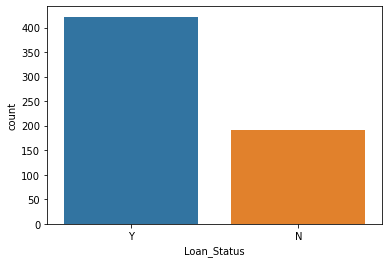

In [14]:
# Let's plot the Unique value counts
sns.countplot(x = 'Loan_Status', data = data)

Hence it is a Imbalanced Dataset.

    1)Two-third of Loan_Status is having Yes value.

    2)One-third of Loan_Status is having No value.




Two methods for handling Imbalanced Dataset.

    1)Increase rejected applicants i.e., Loan_Status having No values

    2)Remove accepted applicants i.e., Loan_Status Yes values

Feature Engineering

In [15]:
# 1. Loan ID
data['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Each Loan taken individual having their own individual Loan_ID. But we know the fact, in anyway an individual's Loan_ID is not going to create an impact on their Loan Status. So we can drop this column.

Gender

In [16]:
# TODO : Describe Gender column
data['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

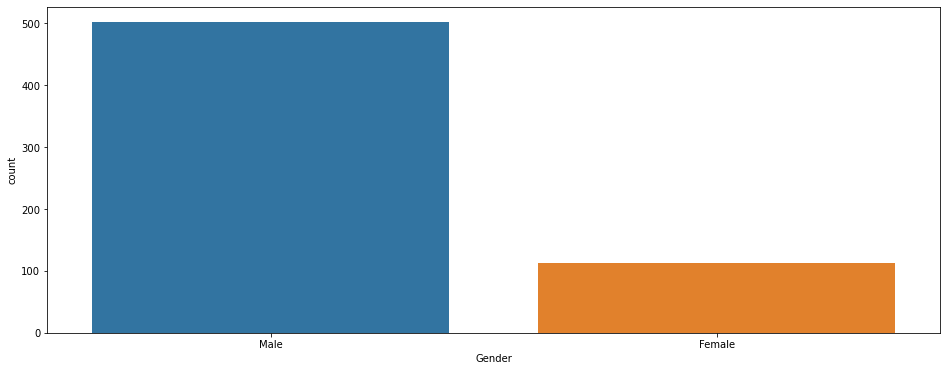

In [17]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'Gender', data = data)
plt.savefig('gender_counts.png')

In [18]:
print("Number of null values : ", data['Gender'].isnull().sum())
print("Unique values : ", data['Gender'].unique())
print("Value counts : \n", data['Gender'].value_counts())

Number of null values :  0
Unique values :  ['Male' 'Female']
Value counts : 
 Male      502
Female    112
Name: Gender, dtype: int64


In [19]:
data['Gender'] = data['Gender'].map({'Female':0,'Male':1}).astype(np.int)

Married

In [20]:
# TODO : Describing Married column
data['Married'].describe()

count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

In [21]:
data['Married'] = data['Married'].map({'No':0, 'Yes':1}).astype(np.int)

Dependent

In [22]:
# TODO : Describing Dependents column
data['Dependents'].describe()

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

In [23]:
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Dependents'] = data['Dependents'].astype(np.int)

Education

In [24]:

# TODO : Descriptive Statistics on EDucation columns
data['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [25]:
data['Education'] = data['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)

Self_Employed

In [26]:
# TODO : Descriptive Statistics on Self_Employed column
data['Self_Employed'].describe()

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

In [27]:
# TODO : Uniques and Values count on Self_Employed column
print("Number of null values : ", data['Self_Employed'].isnull().sum())
print("Unique values : ", data['Self_Employed'].unique())
print("Value counts : \n", data['Self_Employed'].value_counts())

Number of null values :  0
Unique values :  ['No' 'Yes']
Value counts : 
 No     532
Yes     82
Name: Self_Employed, dtype: int64


Nearly 86% percentage of the applicant are not self employed.

In [28]:
data['Self_Employed'] = data['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)

Applicant Income

In [29]:
# Let's get the knowledge about Applicant Income

# Descriptive Statistics on Applicant Income
data['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

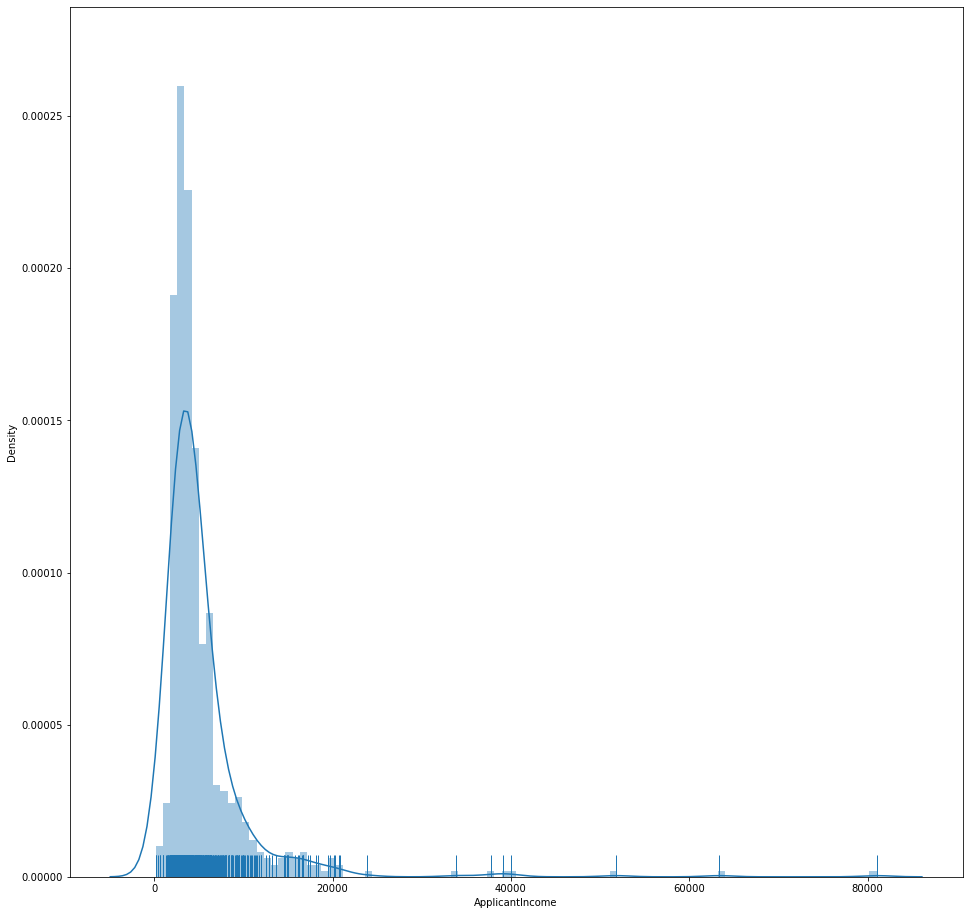

In [30]:
plt.figure(figsize = (16, 16))
sns.distplot(data['ApplicantIncome'], rug = True, bins = 100)

From the above distplot, most of the Applicants income less than Rs.10,000 and some considerable amount of applicants having income between Rs.10,000 and Rs.20,000.

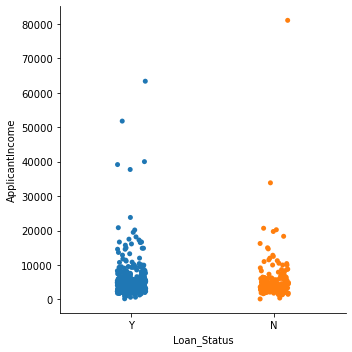

In [31]:
#Let's know the contribution of Applicant Income on determining Loan_Status 
sns.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = data)

From the above categorical plot, Applicant's income failed to differentiate Loan_Status. For more accuracy, we may drop the Applicant Income column.

Co-applicant Income

In [32]:
# Descriptive Statistics on Co-applicant's Income
data['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

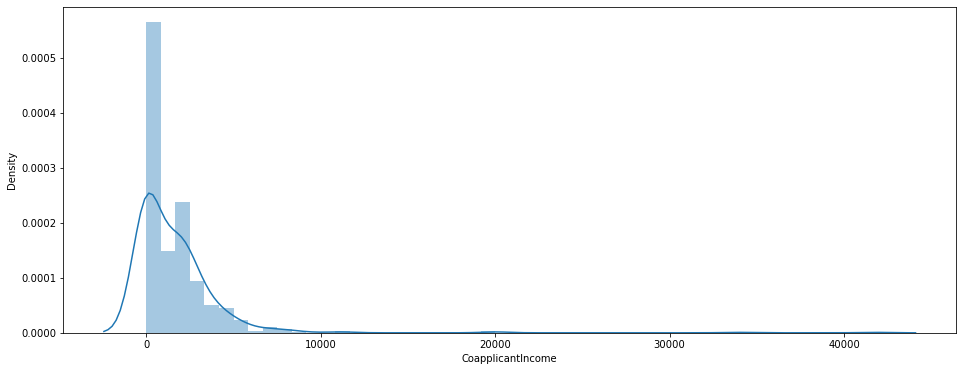

In [33]:
plt.figure(figsize = (16, 6))
sns.distplot(data['CoapplicantIncome'])

From the above plot most of the co-applicant income is zero or nearer to zero

In [34]:
# TODO : Let's get the different values counts on CoapplicantIncome column
data['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount

In [35]:
# TODO : Descriptive Statistics on LoanAmount
data['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

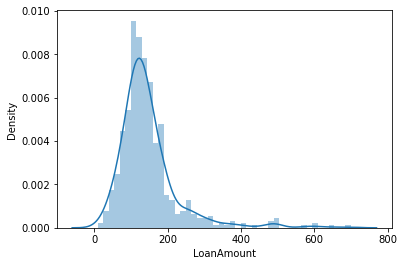

In [36]:
# TODO : Distribution of LoanAmount
sns.distplot(data['LoanAmount'])

In [37]:
# TODO : Let's know the different LoanAmount
data['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

Loan_Amount_Term

In [38]:
# TODO : Descriptive Statistics on Loan_Amount_Term
data['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [39]:
# TODO : Unique Values count in Loan_Amount_Term column
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Most of the applicants which is nearly 83 % of applicant chosen to Loan_Amount_Term of 360.

In [40]:
# TODO : To know if yes in LoanStatus, then what is the average Loan_Amount_Term
#        and if no in LoanStatus, then what is the average Loan_Amount_Term by using GroupBy in LoanStatus

data[~data['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,192.000000,422.000000
mean,344.562500,341.431280
std,68.199402,62.697242
min,36.000000,12.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


For both status of Loan_Status, the average Loan_Amount_Term is approximately. Let's fill them with the value of 360.

Credit_History

In [41]:
# TODO : Descriptive Statistics on Credit_History
data['Credit_History'].describe()

count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [42]:
# TODO : Unique values count on Credit_History
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

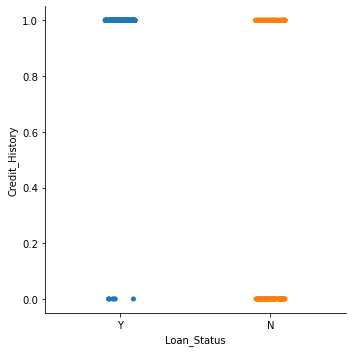

In [43]:
# TODO : To know the contribution of Credit_History on Loan_Status
sns.catplot(x = 'Loan_Status', y = 'Credit_History', data = data)

From the above plot, the point we got is

    If the applicant is having Credit_History, then there is a               difficulty on classifying.

    But if the applicant is not having Credit_History, then there is a       high probability chance of rejection.

 Property_Area

In [44]:
# TODO : Descriptive Statistics on Property_Area
data['Property_Area'].describe()

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [45]:
# TODO : Unique values count in Property_Area column
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Since the Property_Area column having approximately same repetitions on Property_Area columns. we can go with pandas get_dummies for creating separate column for each property area

In [46]:
# TODO : To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(data['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [47]:
# TODO : Create Separate column for Rural , Semiurban and Urban Property_Area
data['Property_Area_Rural'] = Property_Area_Dummies['Rural']
data['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']
data['Property_Area_Urban'] = Property_Area_Dummies['Urban']

In [48]:
# TODO : Dropping Property_Area column as it is replaced with dummy columns
data.drop('Property_Area', axis = 1, inplace = True)

In [49]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [50]:
data.dtypes

Loan_ID                     object
Gender                       int32
Married                      int32
Dependents                   int32
Education                    int32
Self_Employed                int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [51]:
data.shape

(614, 15)

Finally we encoded all the categorical columns as numerical columns optimally except Loan_ID and Loan_Status

From the above discussion, we can remove some of the columns from the training data.

Let's drop the unwanted columns from train data i.e. Loan_ID

In [52]:
# TODO : Dropping Loan_ID column from the data
data.drop('Loan_ID', axis = 1, inplace = True)

Detecting Outliers

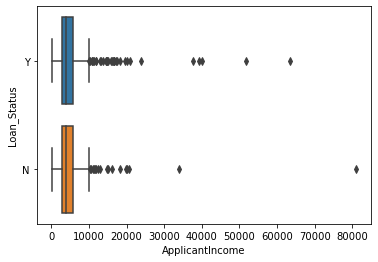

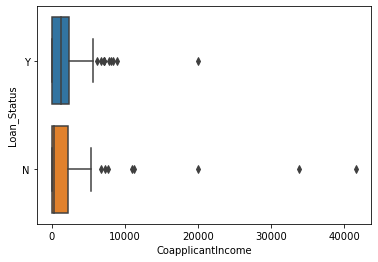

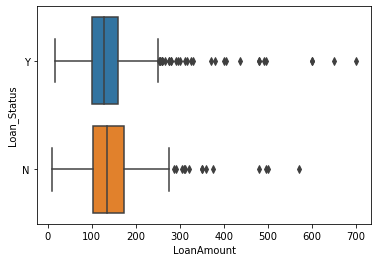

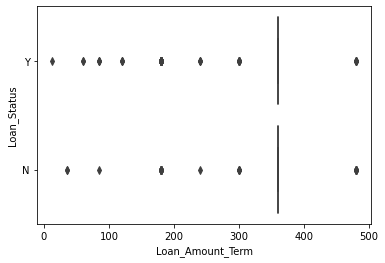

In [53]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sns.boxplot(x = column, y = 'Loan_Status', data = data)
    plt.show()

In [54]:
# TODO : Display samples having outliers on ApplicantIncome
data[data['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
155,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1,0
171,1,1,3,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0,1
183,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1,0
185,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Y,0,1,0
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Y,0,0,1
409,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,N,1,0,0
443,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Y,0,1,0


Drop the samples having yes value on Loan_Status on the above samples listed

In [55]:
samples_index_to_be_dropped = data[data['ApplicantIncome'] > 25000]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
data.drop(index = samples_index_to_be_dropped.index, inplace = True)
data.reset_index(drop = True, inplace = True)

In [56]:
# TODO : Display samples having outliers on ApplicantIncome
data[data['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
398,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1,0
413,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0,1
576,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0,1
595,0,0,3,1,0,416,41667.0,350.0,180.0,1.0,N,0,0,1


Drop the samples having yes value on Loan_Status on the above samples listed

In [57]:
samples_index_to_be_dropped = data[data['CoapplicantIncome'] > 15000]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
data.drop(index = samples_index_to_be_dropped.index, inplace = True)
data.reset_index(drop = True, inplace = True)

In [58]:
# TODO : Display Samples having outliers on LoanAmount
data[data['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
130,1,0,0,1,1,20166,0.0,650.0,480.0,1.0,Y,0,0,1
175,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,N,0,1,0
275,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,Y,0,1,0
305,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,N,1,0,0
365,1,1,0,1,0,19730,5266.0,570.0,360.0,1.0,N,1,0,0
427,1,0,0,1,0,12876,0.0,405.0,360.0,1.0,Y,0,1,0
481,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,N,0,0,1
500,1,1,0,1,0,20833,6667.0,480.0,360.0,1.0,Y,0,0,1
517,1,1,2,1,1,7948,7166.0,480.0,360.0,1.0,Y,1,0,0
555,0,1,1,1,1,19484,0.0,600.0,360.0,1.0,Y,0,1,0


Drop the samples having yes value on Loan_Status on the above samples listed

In [59]:
samples_index_to_be_dropped = data[data['LoanAmount'] > 400]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
data.drop(index = samples_index_to_be_dropped.index, inplace = True)
data.reset_index(drop = True, inplace = True)

Feature Observation

In [60]:
# TODO : Rearranging Train Data columns in order to bring Loan_Status to the last of the DataFrame
data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [61]:
# TODO : Let's do the feature correlation
data_corr = data.corr()
data_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,0.377179,0.177949,-0.046787,0.003536,0.051771,0.077535,0.144304,-0.072635,0.010875,0.080853,-0.105080
Married,0.377179,1.000000,0.333518,-0.013421,0.001297,0.036984,0.089215,0.156433,-0.091772,0.013812,-0.008416,0.008985
Dependents,0.177949,0.333518,1.000000,-0.057815,0.059593,0.123562,0.041787,0.167454,-0.094604,-0.031304,-0.003958,0.003512
Education,-0.046787,-0.013421,-0.057815,1.000000,0.004651,0.135065,0.059683,0.160942,0.076281,0.072134,-0.072783,0.034414
Self_Employed,0.003536,0.001297,0.059593,0.004651,1.000000,0.140782,-0.022710,0.092142,-0.050470,-0.008109,0.020588,0.008171
ApplicantIncome,0.051771,0.036984,0.123562,0.135065,0.140782,1.000000,-0.134805,0.472650,0.009398,-0.030148,0.082232,-0.043675
CoapplicantIncome,0.077535,0.089215,0.041787,0.059683,-0.022710,-0.134805,1.000000,0.268721,-0.070175,0.004740,0.005132,-0.034942
LoanAmount,0.144304,0.156433,0.167454,0.160942,0.092142,0.472650,0.268721,1.000000,0.065949,-0.009103,0.097889,-0.026680
Loan_Amount_Term,-0.072635,-0.091772,-0.094604,0.076281,-0.050470,0.009398,-0.070175,0.065949,1.000000,-0.015969,0.032858,0.061531
Credit_History,0.010875,0.013812,-0.031304,0.072134,-0.008109,-0.030148,0.004740,-0.009103,-0.015969,1.000000,-0.019965,0.038366


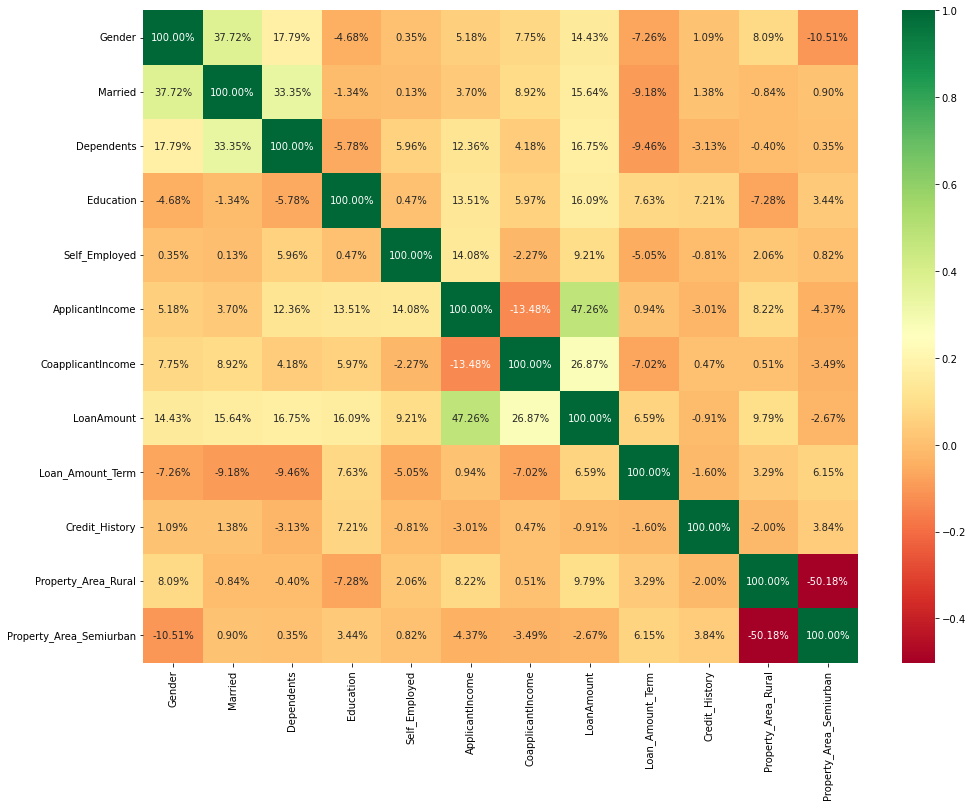

In [62]:
# TODO : Visualizing correlation of features
plt.figure(figsize = (16, 12))
sns.heatmap(data_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('correlation_of_features.png')

In [63]:
# TODO : To know whether the dataset is Balanced or Imbalanced
data['Loan_Status'].value_counts()

Y    409
N    192
Name: Loan_Status, dtype: int64

We have to make the Training Data some more balanced

To make the data to be balanced, we are going to duplicate the samples having Loan_Status as NO

In [64]:
# TODO : Correlation of Features
corr_with_loan_status = data.corrwith(data['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender                     0.017152
Married                    0.091647
Dependents                 0.008800
Education                  0.078801
Self_Employed             -0.011484
ApplicantIncome           -0.072933
CoapplicantIncome         -0.069111
LoanAmount                -0.110765
Loan_Amount_Term          -0.021739
Credit_History             0.543933
Property_Area_Rural       -0.094845
Property_Area_Semiurban    0.131841
dtype: float64

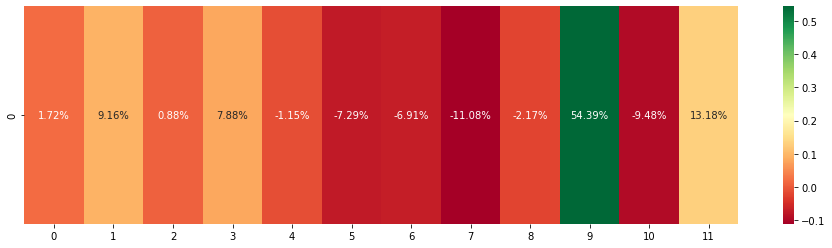

In [65]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sns.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('correlation_of_features_with_loan_status.png')

Credit_History is having more correlation with Loan_Status

<Figure size 864x432 with 0 Axes>

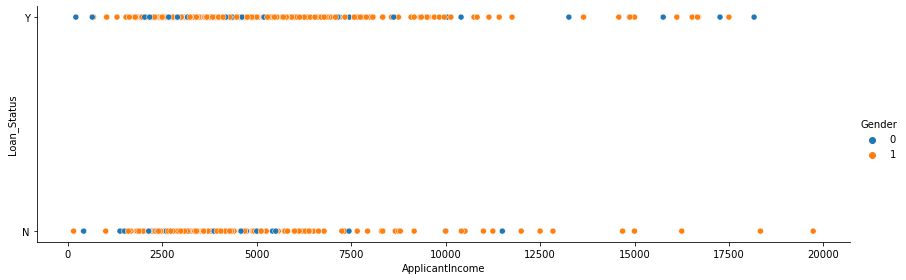

In [66]:
# TODO : Relation between Gender, Applicant Income and Loan Status
plt.figure(figsize = (12, 6))
sns.relplot(x = 'ApplicantIncome', y = 'Loan_Status', data = data[data['ApplicantIncome'] <= 20000], hue = 'Gender', aspect = 3, height = 4)

Looks Same for both the cases

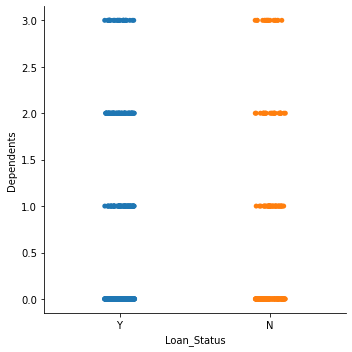

In [67]:
# Relation Between Dependents and Loan Status
sns.catplot(x = 'Loan_Status', y = 'Dependents', data = data)

Looks same for both the cases

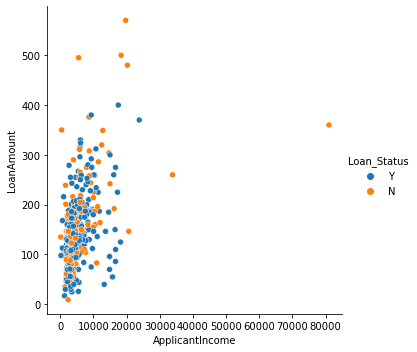

In [68]:
# Relation Between ApplicantIncome and LoanAmount with hue as Loan_Status
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data =data , hue = 'Loan_Status')

There is a relation between LoanAmount and Applicant Income but not classifying Loan_Status

In [69]:
# TODO : To know the feature Importances
y = data['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(data.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = data.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                      2.181644
Married                     2.223683
Dependents                  6.001293
Education                   2.393624
Self_Employed               2.192865
ApplicantIncome            18.061010
CoapplicantIncome          11.799775
LoanAmount                 18.340127
Loan_Amount_Term            4.577589
Credit_History             28.445625
Property_Area_Rural         1.778350
Property_Area_Semiurban     2.004416
dtype: float64

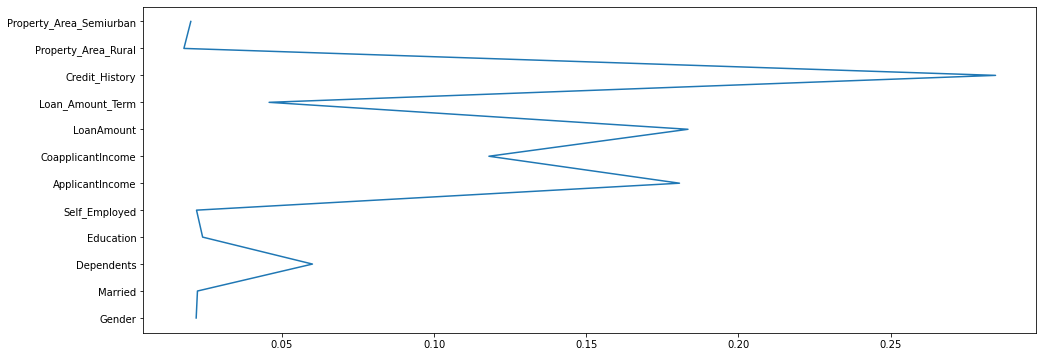

In [70]:
plt.figure(figsize=(16, 6))
plt.plot(etc.feature_importances_, data.columns[:-1])
plt.savefig("feature_importances.png")

From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status

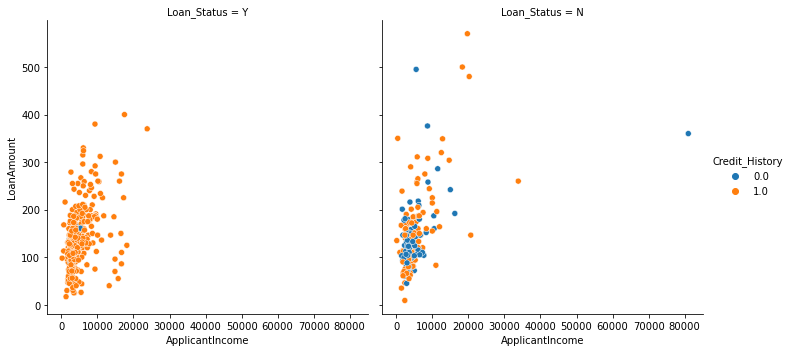

In [71]:
# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = data , hue = 'Credit_History', col = 'Loan_Status')

From the above plot,

    The applicants those who are all having the credit history mostly getting te Loan Amount

    From this, Credit_History is the major feature.

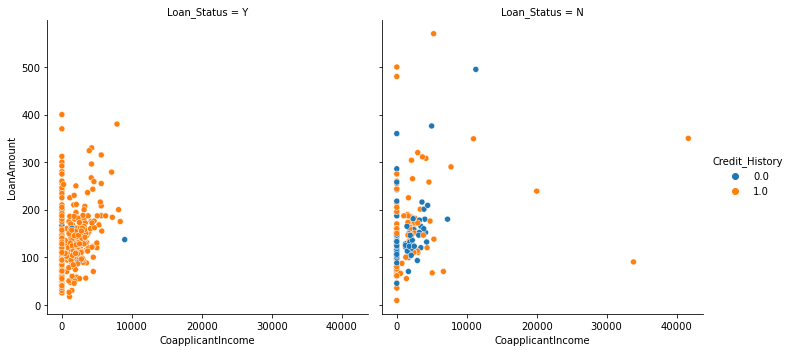

In [72]:

# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sns.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = data , hue = 'Credit_History', col = 'Loan_Status')

Most of the Co-applicants are not having income

# Feature Selection

In [73]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = data.columns[:-1]).sort_values(ascending = False)

In [74]:
# TODO : Extracting Features name
prediction_features = prediction_features.index

In [75]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

# Model Building

In [76]:
feature_columns = data[prediction_features]
prediction_column = data['Loan_Status']

In [77]:
X = feature_columns.values
y = prediction_column.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 5), (121, 5), (480,), (121,))

# Model Performance

# Simple Logistic Regression

In [80]:
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 81.66666666666667%
Testing Accuracy  : 80.16528925619835%


Thus our Logistic Regression model is having 81% Training Accuracy and 80% Testing Accuracy

In [81]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

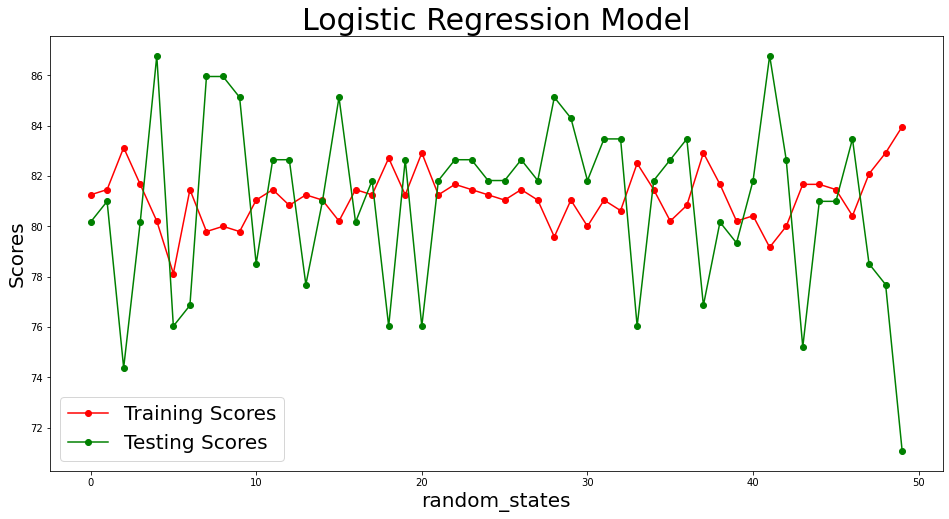

In [83]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.savefig('logistic_model_performance.png')
plt.show()

In [84]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(81.25, 80.16528925619835, 1.0847107438016508)
(81.45833333333333, 80.99173553719008, 0.4665977961432475)
(83.125, 74.3801652892562, 8.744834710743802)
(81.66666666666667, 80.16528925619835, 1.5013774104683222)
(80.20833333333334, 86.77685950413223, 6.56852617079889)
(78.125, 76.03305785123968, 2.0919421487603245)
(81.45833333333333, 76.85950413223141, 4.598829201101921)
(79.79166666666667, 85.9504132231405, 6.1587465564738295)
(80.0, 85.9504132231405, 5.950413223140501)
(79.79166666666667, 85.12396694214877, 5.332300275482098)
(81.04166666666667, 78.51239669421489, 2.529269972451786)
(81.45833333333333, 82.64462809917356, 1.1862947658402305)
(80.83333333333333, 82.64462809917356, 1.8112947658402305)
(81.25, 77.68595041322314, 3.5640495867768607)
(81.04166666666667, 80.99173553719008, 0.049931129476590286)
(80.20833333333334, 85.12396694214877, 4.915633608815426)
(81.45833333333333, 80.16528925619835, 1.2930440771349794)
(81.25, 81.81818181818183, 0.5681818181818272)
(82.70833333333333

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

Logistic Regression with Standard Scaling and PCA

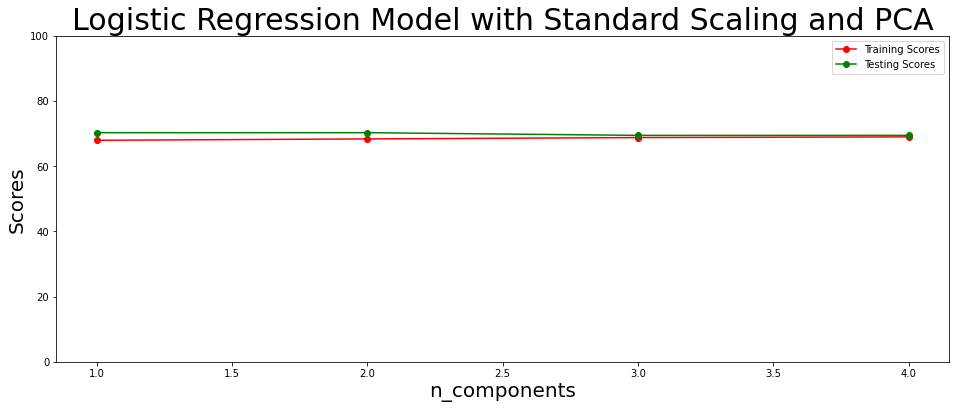

In [86]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
#     standard_scaler = StandardScaler()
#     # Scaling training samples
#     scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
#     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

# Decision Tree Classifier

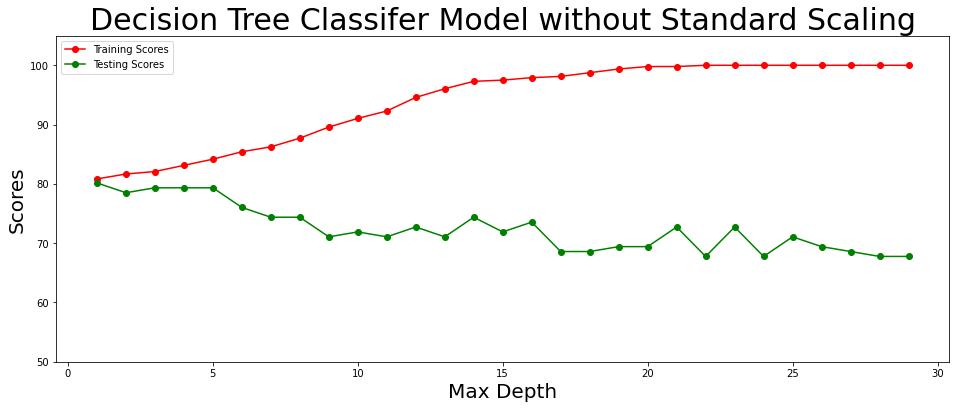

In [89]:
from sklearn.tree import DecisionTreeClassifier

training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.savefig('decision_tree_model_performance.png')
plt.show()

For Decision Tree Classifier model, we are going to choose max_depth as 1 from the above plot.

In [90]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(80.83333333333333, 80.16528925619835)
(81.66666666666667, 78.51239669421489)
(82.08333333333333, 79.33884297520662)
(83.125, 79.33884297520662)
(84.16666666666667, 79.33884297520662)
(85.41666666666666, 76.03305785123968)
(86.25, 74.3801652892562)
(87.70833333333333, 74.3801652892562)
(89.58333333333334, 71.07438016528926)
(91.04166666666667, 71.900826446281)
(92.29166666666667, 71.07438016528926)
(94.58333333333333, 72.72727272727273)
(96.04166666666667, 71.07438016528926)
(97.29166666666667, 74.3801652892562)
(97.5, 71.900826446281)
(97.91666666666666, 73.55371900826447)
(98.125, 68.59504132231406)
(98.75, 68.59504132231406)
(99.375, 69.42148760330579)
(99.79166666666667, 69.42148760330579)
(99.79166666666667, 72.72727272727273)
(100.0, 67.76859504132231)
(100.0, 72.72727272727273)
(100.0, 67.76859504132231)
(100.0, 71.07438016528926)
(100.0, 69.42148760330579)
(100.0, 68.59504132231406)
(100.0, 67.76859504132231)
(100.0, 67.76859504132231)


For max_depth = 1 , we get a Training Accuracy of 80.83% and a Testing Accuracy of 80.16%

Decision Tree Classifier with Standard Scaling and PCA

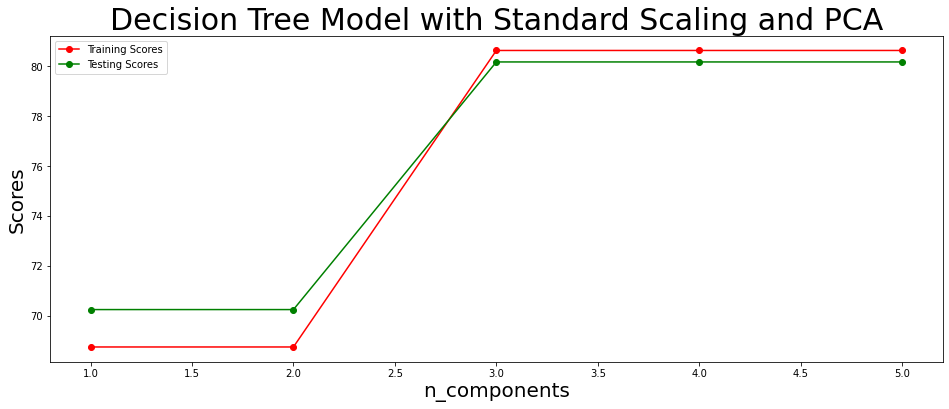

Max_Depth :  1
(68.75, 70.24793388429752)
(68.75, 70.24793388429752)
(80.625, 80.16528925619835)
(80.625, 80.16528925619835)
(80.625, 80.16528925619835)


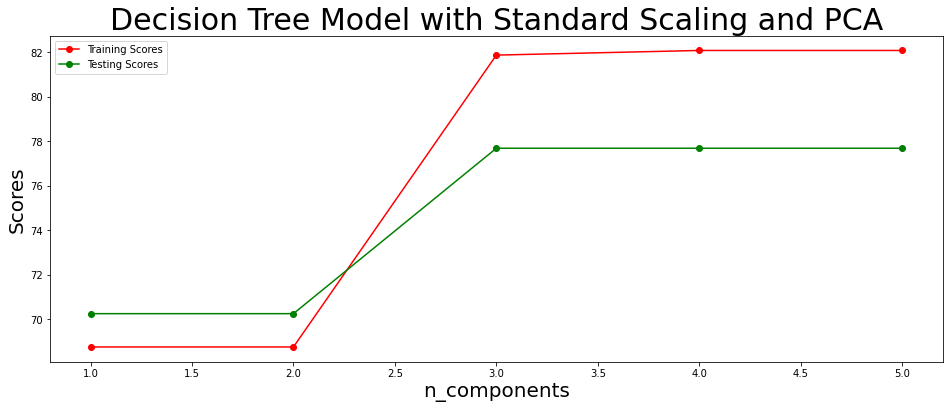

Max_Depth :  2
(68.75, 70.24793388429752)
(68.75, 70.24793388429752)
(81.875, 77.68595041322314)
(82.08333333333333, 77.68595041322314)
(82.08333333333333, 77.68595041322314)


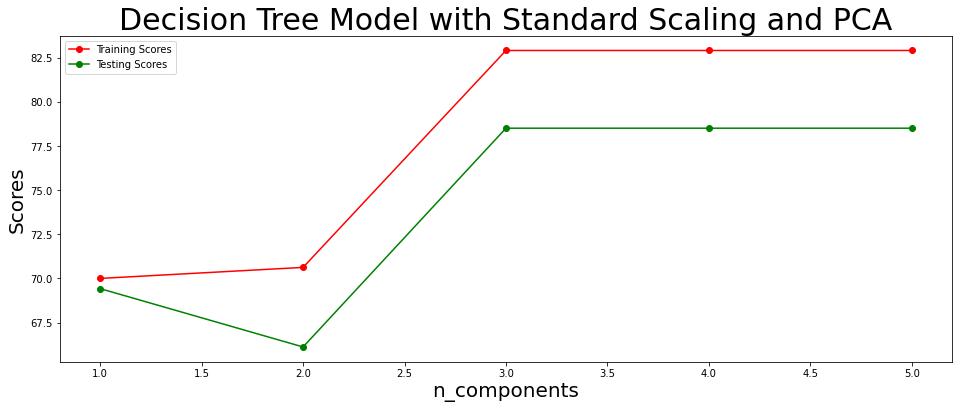

Max_Depth :  3
(70.0, 69.42148760330579)
(70.625, 66.11570247933885)
(82.91666666666667, 78.51239669421489)
(82.91666666666667, 78.51239669421489)
(82.91666666666667, 78.51239669421489)


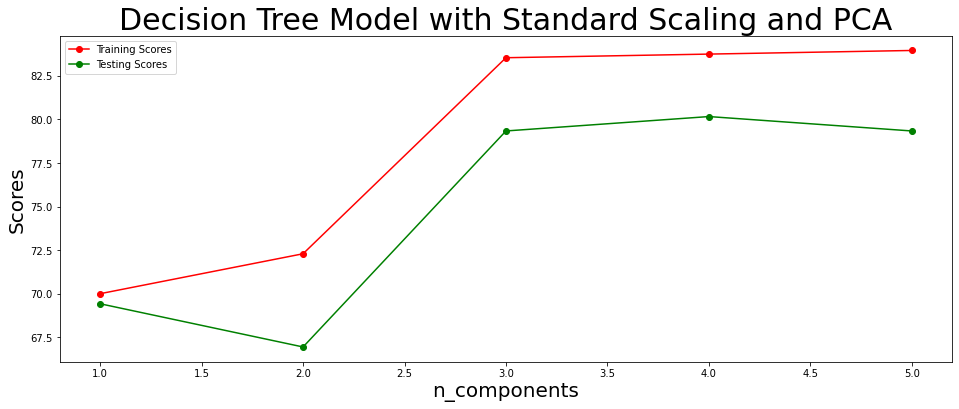

Max_Depth :  4
(70.0, 69.42148760330579)
(72.29166666666667, 66.94214876033058)
(83.54166666666667, 79.33884297520662)
(83.75, 80.16528925619835)
(83.95833333333333, 79.33884297520662)


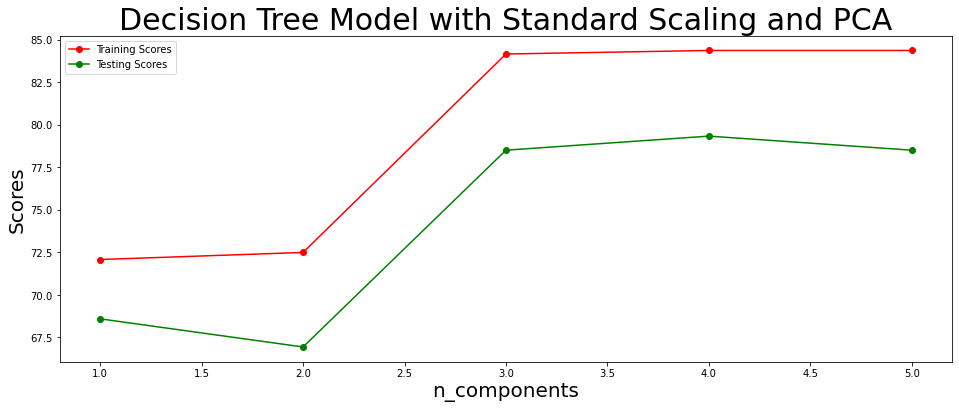

Max_Depth :  5
(72.08333333333333, 68.59504132231406)
(72.5, 66.94214876033058)
(84.16666666666667, 78.51239669421489)
(84.375, 79.33884297520662)
(84.375, 78.51239669421489)


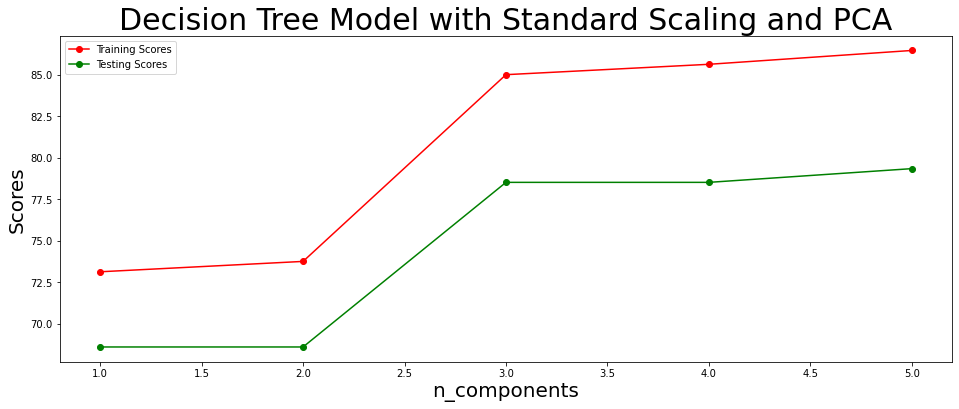

Max_Depth :  6
(73.125, 68.59504132231406)
(73.75, 68.59504132231406)
(85.0, 78.51239669421489)
(85.625, 78.51239669421489)
(86.45833333333334, 79.33884297520662)


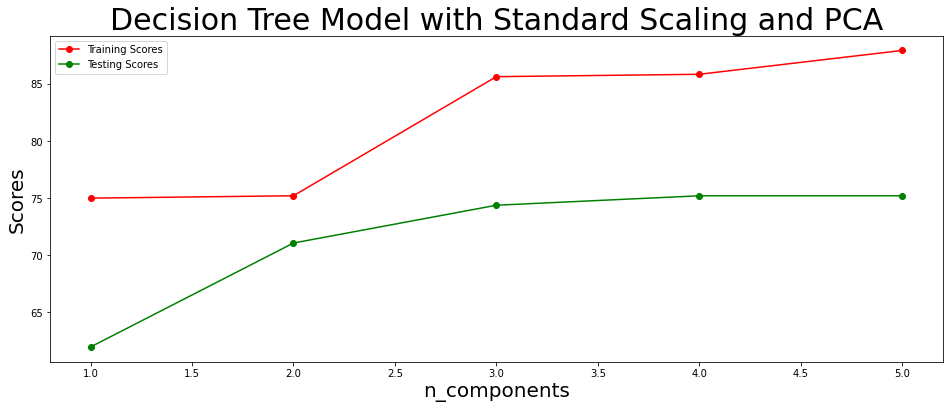

Max_Depth :  7
(75.0, 61.98347107438017)
(75.20833333333333, 71.07438016528926)
(85.625, 74.3801652892562)
(85.83333333333333, 75.20661157024794)
(87.91666666666667, 75.20661157024794)


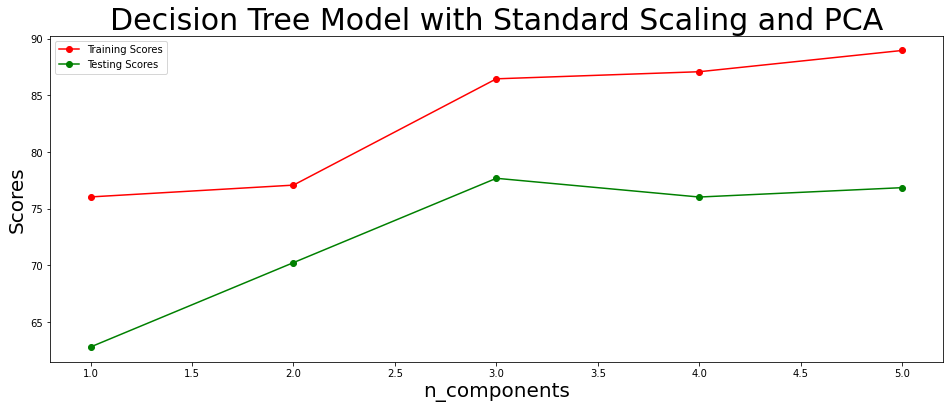

Max_Depth :  8
(76.04166666666666, 62.8099173553719)
(77.08333333333334, 70.24793388429752)
(86.45833333333334, 77.68595041322314)
(87.08333333333333, 76.03305785123968)
(88.95833333333333, 76.85950413223141)


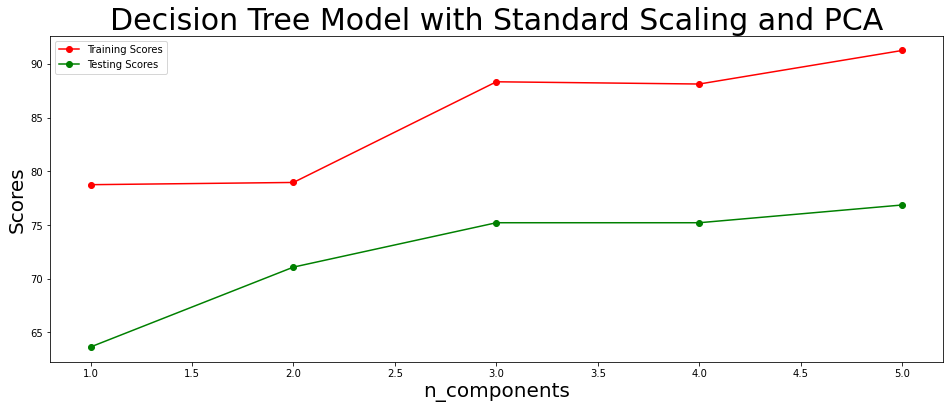

Max_Depth :  9
(78.75, 63.63636363636363)
(78.95833333333333, 71.07438016528926)
(88.33333333333333, 75.20661157024794)
(88.125, 75.20661157024794)
(91.25, 76.85950413223141)


In [95]:
for max_depth in range(1,10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 83.75% and a Testing accuracy of 80.16%

Decision Tree Classifier Model with Standard Scaling and PCA :

Random_state = 3
Max-Depth = 4
Training Accuracy : 83.75 %
Testing Accuracy : 80.16 %